## Twitter Sentiment Analysis
`sentiment analysis where task will be to classify a set of tweets into two categories: 1. racist, 2.non-racist`

- Sentiment analysis(also known as opinion mining)is one of the many applications of **Natural Language Processing.**

- Is is a set of methods and techniques used for extracting subjective infromation from **text or speech,such as attitudes.**

- In simple terms,it involves classifying a text as **positive, negative or neutral.**

**Objective**<br>
In this will solve sentiment analysis problem using Python.

**1. Text Preprocessing**<br>
**2. Data Exploration**<br>
**3. Feature Extraction**<br>
**4. Model Building**<br>



1.Understanding the problems statement<br>
**Let's load the libraries**

In [12]:
#twitter analysis
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)

Text is higly unstructured from data,various types of not readily analyzed without any preprocessing. 

The entire process of cleaning and standardization of text,making it noise free and ready for analysis is known as text preprocessing.`

It can be Divide into two types<br>
    - 1.Data inspection 2.Data cleaning

**Loading the Data set**

In [13]:

train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

### Data Inspection

In [21]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [22]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [23]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [5]:
train.shape,test.shape

((31962, 3), (17197, 2))

By checking the dimensions of train and test dataset.<br>
    - Train set has 31962 columns and 3 rows
    - Test set has 17197 columns and  2 rows


In [6]:
train["label"].value_counts()
#2,242 tweets labelled as raciest/sexiest 
#29,720 is labbelled as non raciest/sexiest so it is imbalanced dataset.

0    29720
1     2242
Name: label, dtype: int64

By using `value_counts()` will get unique values.Exception of `null values`<br>
So here we got two unoque values `'0'` category and another one is `'1'` category<br>

According to this theory we have 
    - 2,247(~7%) tweets labelled as racist or sexiest.
    - 29,720(~93%) tweets labelled as non racist or sexiest. 
**So it is imbalanced classification.**

###### Finding the distribution of length of tweets,in terms of words,in both train and test data

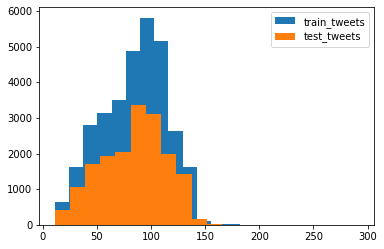

In [25]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train,bins = 20,label = "train_tweets")
plt.hist(length_test,bins = 20,label = "test_tweets")
plt.legend()
plt.show()

### Data Cleaning

- It helps in getting rid of the unanted words and charactersehich helps in obtaining the better features.
- Objective of this step is to clean noise those are less relevant to fing the sentiment of tweets such as `punctuation`,`special character`,`numbers`,and `terms` which do not any carry sense to the context of sentiment analysis 


**Before going further will combine train and test datasets**

In [26]:
combi = train.append(test,ignore_index=True)
combi.shape

C:\Users\hello\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(49159, 3)

In [27]:
def remove_pattern(input_txt, pattern):
    r =re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt
    

***steps to clean the raw tweets***
   
   
- 1.Removing the twitter handles `@user` due to privacy concern.
- 2.we will get rid of `punctuations`,`numbers`,`special characters` because of no use in this context
- 3.Most of the smaller words do not add much value.
- 4.we will normalize the text data,we can reduce them their root word.

###### 1. Removing Twitter Handles(@user)
         - we have passed '@[]' as the pattern to remove_pattern function(its regular expression), which will pick any word starting with '@'

In [29]:
#removing twitter handles(@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'],"@\w*")
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


###### 2. Removing Punctuations,Numbers and special characters
- Here we will replace everything with spacces except characters and hashtags.

**The Regular Expression is `[^a-zA-Z#]` means anything except alphabets and '#'.**

In [30]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


###### 3. Removing short words
- The length of the words which I want to remove length of word is  3 or less<br>
        - for example : hmm,oh etc

In [31]:
#removing shortwords
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


   * Now we have seen difference between the raw tweets and cleaned tweets(tidy_tweet)quite clearly.
   * Only the important words in the tweets have been retained and the noise has been removed. 

###### 4.Text Normalization

- **Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.**

- we will use nltk's `PorterStemmer()`function to normalize the tweets.


In [32]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) #tokenizing
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

**Normalizing the tokenized tweets**

In [33]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x]) #stemming
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

**Now we will stitch those back together, it can be easily done using `MosesDetokenizer` function.**

In [34]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

In [37]:
tokenized_tweet.head(2)

0                                w h e n   f a t h e r   d y s f u n c t   s e l f i s h   d r a g   k i d   i n t o   d y s f u n c t   # r u n
1    t h a n k   # l y f t   c r e d i t   c a u s   t h e y   o f f e r   w h e e l c h a i r   v a n   # d i s a p o i n t   # g e t t h a n k
Name: tidy_tweet, dtype: object

<image src = "Twitter sentiment.png">